<a href="https://colab.research.google.com/github/LeTrungDunggg/LeTrungDunggg/blob/main/MONEY_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam,SGD
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [122]:
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [123]:
training_data=train_datagen.flow_from_directory('/content/drive/MyDrive/AI/HW13/MONEY_CNN/train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 317 images belonging to 11 classes.


In [124]:
validation_data=train_datagen.flow_from_directory('/content/drive/MyDrive/AI/HW13/MONEY_CNN/validation',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 118 images belonging to 11 classes.


In [125]:
training_data.class_indices

{'1000': 0,
 '10000': 1,
 '100000': 2,
 '200': 3,
 '2000': 4,
 '20000': 5,
 '200000': 6,
 '500': 7,
 '5000': 8,
 '50000': 9,
 '500000': 10}

In [126]:
model=Sequential()
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) # Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) # Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) # Tích chập 256 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(512,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) # Tích chập 512 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(512,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(11,activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 150, 150, 64)      1792      
                                                                 
 conv2d_49 (Conv2D)          (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 75, 75, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 75, 75, 128)       73856     
                                                                 
 conv2d_51 (Conv2D)          (None, 75, 75, 128)       147584    
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 37, 37, 128)      0         
 g2D)                                                 

In [127]:
#opt=SGD(lr=0.01,momentum=0.9)
#model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

In [128]:
history=model.fit(training_data,epochs=1000,batch_size=100,verbose=1, validation_data=validation_data, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/1000
10/10 [==============================] - 115s 12s/step - loss: 8.7742 - accuracy: 0.0789 - val_loss: 2.4182 - val_accuracy: 0.1525
Epoch 2/1000
10/10 [==============================] - 4s 355ms/step - loss: 2.3427 - accuracy: 0.1041 - val_loss: 2.5440 - val_accuracy: 0.0847
Epoch 3/1000
10/10 [==============================] - 4s 363ms/step - loss: 2.3069 - accuracy: 0.1388 - val_loss: 2.3530 - val_accuracy: 0.1271
Epoch 4/1000
10/10 [==============================] - 4s 362ms/step - loss: 2.2321 - accuracy: 0.1703 - val_loss: 2.5084 - val_accuracy: 0.1102
Epoch 5/1000
10/10 [==============================] - 4s 353ms/step - loss: 2.1675 - accuracy: 0.2965 - val_loss: 2.7557 - val_accuracy: 0.1610
Epoch 6/1000
10/10 [==============================] - 4s 357ms/step - loss: 2.2241 - accuracy: 0.1767 - val_loss: 2.3143 - val_accuracy: 0.1102
Epoch 7/1000
10/10 [==============================] - 4s 359ms/step - loss: 2.1525 - accuracy: 0.1672 - val_loss: 2.2902 - val_accuracy:

In [129]:
Score=model.evaluate(validation_data,verbose=0)
print('Test loss',Score[0])
print('Test accuary', Score[1])

Test loss 17.277236938476562
Test accuary 0.2542372941970825


<function matplotlib.pyplot.show>

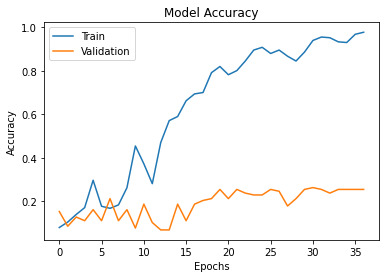

In [130]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [131]:
model.save("Money.h5")

In [132]:
model_CNN=load_model('Money.h5')

1k


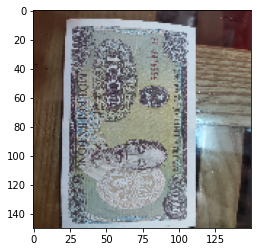

In [144]:
img=load_img('/content/drive/MyDrive/AI/HW13/MONEY_CNN/test/1k.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='1k'
if round(result[0][1])==1:
  prediction='10k'
if round(result[0][2])==1:
  prediction='100k'
if round(result[0][3])==1:
  prediction='200d'
if round(result[0][4])==1:
  prediction='2k'
if round(result[0][5])==1:
  prediction='20k'
if round(result[0][6])==1:
  prediction='200k'
if round(result[0][7])==1:
  prediction='500d'
if round(result[0][8])==1:
  prediction='5k'
if round(result[0][9])==1:
  prediction='50k'
if round(result[0][10])==1:
  prediction='500k'
print(prediction)


1k


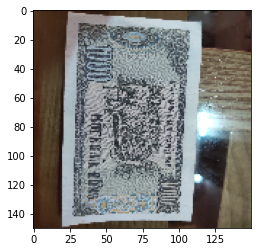

In [147]:
img=load_img('/content/drive/MyDrive/AI/HW13/MONEY_CNN/test/1ngan.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='1k'
if round(result[0][1])==1:
  prediction='10k'
if round(result[0][2])==1:
  prediction='100k'
if round(result[0][3])==1:
  prediction='200d'
if round(result[0][4])==1:
  prediction='2k'
if round(result[0][5])==1:
  prediction='20k'
if round(result[0][6])==1:
  prediction='200k'
if round(result[0][7])==1:
  prediction='500d'
if round(result[0][8])==1:
  prediction='5k'
if round(result[0][9])==1:
  prediction='50k'
if round(result[0][10])==1:
  prediction='500k'
print(prediction)


2k


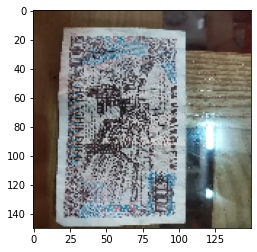

In [148]:
img=load_img('/content/drive/MyDrive/AI/HW13/MONEY_CNN/test/2k.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='1k'
if round(result[0][1])==1:
  prediction='10k'
if round(result[0][2])==1:
  prediction='100k'
if round(result[0][3])==1:
  prediction='200d'
if round(result[0][4])==1:
  prediction='2k'
if round(result[0][5])==1:
  prediction='20k'
if round(result[0][6])==1:
  prediction='200k'
if round(result[0][7])==1:
  prediction='500d'
if round(result[0][8])==1:
  prediction='5k'
if round(result[0][9])==1:
  prediction='50k'
if round(result[0][10])==1:
  prediction='500k'
print(prediction)


2k


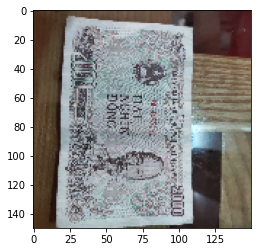

In [149]:
img=load_img('/content/drive/MyDrive/AI/HW13/MONEY_CNN/test/2ngan.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='1k'
if round(result[0][1])==1:
  prediction='10k'
if round(result[0][2])==1:
  prediction='100k'
if round(result[0][3])==1:
  prediction='200d'
if round(result[0][4])==1:
  prediction='2k'
if round(result[0][5])==1:
  prediction='20k'
if round(result[0][6])==1:
  prediction='200k'
if round(result[0][7])==1:
  prediction='500d'
if round(result[0][8])==1:
  prediction='5k'
if round(result[0][9])==1:
  prediction='50k'
if round(result[0][10])==1:
  prediction='500k'
print(prediction)


5k


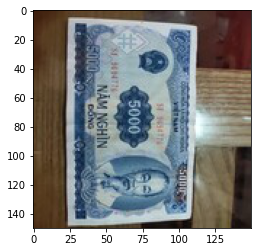

In [150]:
img=load_img('/content/drive/MyDrive/AI/HW13/MONEY_CNN/test/5k.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='1k'
if round(result[0][1])==1:
  prediction='10k'
if round(result[0][2])==1:
  prediction='100k'
if round(result[0][3])==1:
  prediction='200d'
if round(result[0][4])==1:
  prediction='2k'
if round(result[0][5])==1:
  prediction='20k'
if round(result[0][6])==1:
  prediction='200k'
if round(result[0][7])==1:
  prediction='500d'
if round(result[0][8])==1:
  prediction='5k'
if round(result[0][9])==1:
  prediction='50k'
if round(result[0][10])==1:
  prediction='500k'
print(prediction)


5k


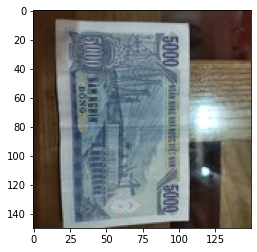

In [151]:
img=load_img('/content/drive/MyDrive/AI/HW13/MONEY_CNN/test/5ngan.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='1k'
if round(result[0][1])==1:
  prediction='10k'
if round(result[0][2])==1:
  prediction='100k'
if round(result[0][3])==1:
  prediction='200d'
if round(result[0][4])==1:
  prediction='2k'
if round(result[0][5])==1:
  prediction='20k'
if round(result[0][6])==1:
  prediction='200k'
if round(result[0][7])==1:
  prediction='500d'
if round(result[0][8])==1:
  prediction='5k'
if round(result[0][9])==1:
  prediction='50k'
if round(result[0][10])==1:
  prediction='500k'
print(prediction)


10k


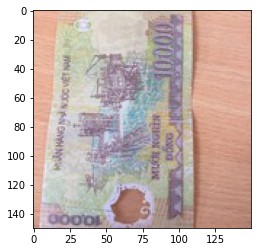

In [152]:
img=load_img('/content/drive/MyDrive/AI/HW13/MONEY_CNN/test/10k.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='1k'
if round(result[0][1])==1:
  prediction='10k'
if round(result[0][2])==1:
  prediction='100k'
if round(result[0][3])==1:
  prediction='200d'
if round(result[0][4])==1:
  prediction='2k'
if round(result[0][5])==1:
  prediction='20k'
if round(result[0][6])==1:
  prediction='200k'
if round(result[0][7])==1:
  prediction='500d'
if round(result[0][8])==1:
  prediction='5k'
if round(result[0][9])==1:
  prediction='50k'
if round(result[0][10])==1:
  prediction='500k'
print(prediction)


10k


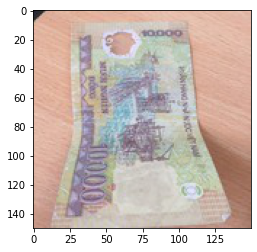

In [153]:
img=load_img('/content/drive/MyDrive/AI/HW13/MONEY_CNN/test/10k1.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='1k'
if round(result[0][1])==1:
  prediction='10k'
if round(result[0][2])==1:
  prediction='100k'
if round(result[0][3])==1:
  prediction='200d'
if round(result[0][4])==1:
  prediction='2k'
if round(result[0][5])==1:
  prediction='20k'
if round(result[0][6])==1:
  prediction='200k'
if round(result[0][7])==1:
  prediction='500d'
if round(result[0][8])==1:
  prediction='5k'
if round(result[0][9])==1:
  prediction='50k'
if round(result[0][10])==1:
  prediction='500k'
print(prediction)


10k


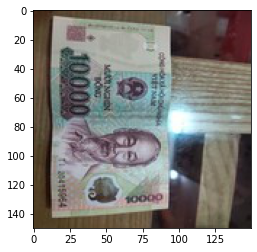

In [154]:
img=load_img('/content/drive/MyDrive/AI/HW13/MONEY_CNN/test/10ngan.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='1k'
if round(result[0][1])==1:
  prediction='10k'
if round(result[0][2])==1:
  prediction='100k'
if round(result[0][3])==1:
  prediction='200d'
if round(result[0][4])==1:
  prediction='2k'
if round(result[0][5])==1:
  prediction='20k'
if round(result[0][6])==1:
  prediction='200k'
if round(result[0][7])==1:
  prediction='500d'
if round(result[0][8])==1:
  prediction='5k'
if round(result[0][9])==1:
  prediction='50k'
if round(result[0][10])==1:
  prediction='500k'
print(prediction)


10k


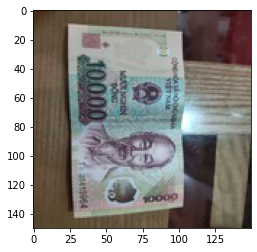

In [155]:
img=load_img('/content/drive/MyDrive/AI/HW13/MONEY_CNN/test/10ngandong.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='1k'
if round(result[0][1])==1:
  prediction='10k'
if round(result[0][2])==1:
  prediction='100k'
if round(result[0][3])==1:
  prediction='200d'
if round(result[0][4])==1:
  prediction='2k'
if round(result[0][5])==1:
  prediction='20k'
if round(result[0][6])==1:
  prediction='200k'
if round(result[0][7])==1:
  prediction='500d'
if round(result[0][8])==1:
  prediction='5k'
if round(result[0][9])==1:
  prediction='50k'
if round(result[0][10])==1:
  prediction='500k'
print(prediction)


500k


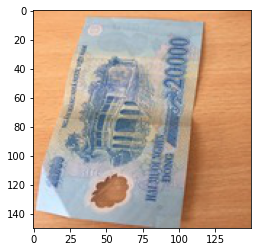

In [156]:
img=load_img('/content/drive/MyDrive/AI/HW13/MONEY_CNN/test/20k.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='1k'
if round(result[0][1])==1:
  prediction='10k'
if round(result[0][2])==1:
  prediction='100k'
if round(result[0][3])==1:
  prediction='200d'
if round(result[0][4])==1:
  prediction='2k'
if round(result[0][5])==1:
  prediction='20k'
if round(result[0][6])==1:
  prediction='200k'
if round(result[0][7])==1:
  prediction='500d'
if round(result[0][8])==1:
  prediction='5k'
if round(result[0][9])==1:
  prediction='50k'
if round(result[0][10])==1:
  prediction='500k'
print(prediction)


20k


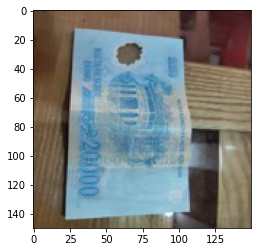

In [158]:
img=load_img('/content/drive/MyDrive/AI/HW13/MONEY_CNN/test/20k2.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='1k'
if round(result[0][1])==1:
  prediction='10k'
if round(result[0][2])==1:
  prediction='100k'
if round(result[0][3])==1:
  prediction='200d'
if round(result[0][4])==1:
  prediction='2k'
if round(result[0][5])==1:
  prediction='20k'
if round(result[0][6])==1:
  prediction='200k'
if round(result[0][7])==1:
  prediction='500d'
if round(result[0][8])==1:
  prediction='5k'
if round(result[0][9])==1:
  prediction='50k'
if round(result[0][10])==1:
  prediction='500k'
print(prediction)


20k


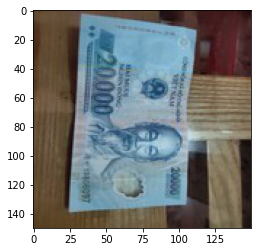

In [159]:
img=load_img('/content/drive/MyDrive/AI/HW13/MONEY_CNN/test/20ngandong.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='1k'
if round(result[0][1])==1:
  prediction='10k'
if round(result[0][2])==1:
  prediction='100k'
if round(result[0][3])==1:
  prediction='200d'
if round(result[0][4])==1:
  prediction='2k'
if round(result[0][5])==1:
  prediction='20k'
if round(result[0][6])==1:
  prediction='200k'
if round(result[0][7])==1:
  prediction='500d'
if round(result[0][8])==1:
  prediction='5k'
if round(result[0][9])==1:
  prediction='50k'
if round(result[0][10])==1:
  prediction='500k'
print(prediction)


50k


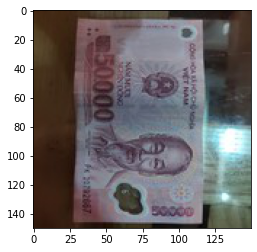

In [160]:
img=load_img('/content/drive/MyDrive/AI/HW13/MONEY_CNN/test/50ngan.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='1k'
if round(result[0][1])==1:
  prediction='10k'
if round(result[0][2])==1:
  prediction='100k'
if round(result[0][3])==1:
  prediction='200d'
if round(result[0][4])==1:
  prediction='2k'
if round(result[0][5])==1:
  prediction='20k'
if round(result[0][6])==1:
  prediction='200k'
if round(result[0][7])==1:
  prediction='500d'
if round(result[0][8])==1:
  prediction='5k'
if round(result[0][9])==1:
  prediction='50k'
if round(result[0][10])==1:
  prediction='500k'
print(prediction)


50k


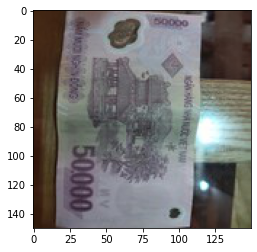

In [161]:
img=load_img('/content/drive/MyDrive/AI/HW13/MONEY_CNN/test/50kk.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='1k'
if round(result[0][1])==1:
  prediction='10k'
if round(result[0][2])==1:
  prediction='100k'
if round(result[0][3])==1:
  prediction='200d'
if round(result[0][4])==1:
  prediction='2k'
if round(result[0][5])==1:
  prediction='20k'
if round(result[0][6])==1:
  prediction='200k'
if round(result[0][7])==1:
  prediction='500d'
if round(result[0][8])==1:
  prediction='5k'
if round(result[0][9])==1:
  prediction='50k'
if round(result[0][10])==1:
  prediction='500k'
print(prediction)


100k


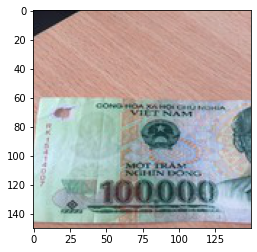

In [162]:
img=load_img('/content/drive/MyDrive/AI/HW13/MONEY_CNN/test/100k.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='1k'
if round(result[0][1])==1:
  prediction='10k'
if round(result[0][2])==1:
  prediction='100k'
if round(result[0][3])==1:
  prediction='200d'
if round(result[0][4])==1:
  prediction='2k'
if round(result[0][5])==1:
  prediction='20k'
if round(result[0][6])==1:
  prediction='200k'
if round(result[0][7])==1:
  prediction='500d'
if round(result[0][8])==1:
  prediction='5k'
if round(result[0][9])==1:
  prediction='50k'
if round(result[0][10])==1:
  prediction='500k'
print(prediction)


100k


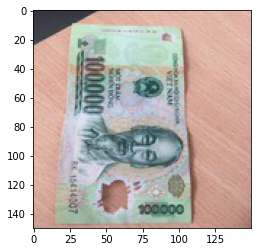

In [163]:
img=load_img('/content/drive/MyDrive/AI/HW13/MONEY_CNN/test/100ngan.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='1k'
if round(result[0][1])==1:
  prediction='10k'
if round(result[0][2])==1:
  prediction='100k'
if round(result[0][3])==1:
  prediction='200d'
if round(result[0][4])==1:
  prediction='2k'
if round(result[0][5])==1:
  prediction='20k'
if round(result[0][6])==1:
  prediction='200k'
if round(result[0][7])==1:
  prediction='500d'
if round(result[0][8])==1:
  prediction='5k'
if round(result[0][9])==1:
  prediction='50k'
if round(result[0][10])==1:
  prediction='500k'
print(prediction)


100k


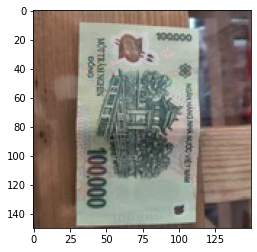

In [164]:
img=load_img('/content/drive/MyDrive/AI/HW13/MONEY_CNN/test/100kk.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='1k'
if round(result[0][1])==1:
  prediction='10k'
if round(result[0][2])==1:
  prediction='100k'
if round(result[0][3])==1:
  prediction='200d'
if round(result[0][4])==1:
  prediction='2k'
if round(result[0][5])==1:
  prediction='20k'
if round(result[0][6])==1:
  prediction='200k'
if round(result[0][7])==1:
  prediction='500d'
if round(result[0][8])==1:
  prediction='5k'
if round(result[0][9])==1:
  prediction='50k'
if round(result[0][10])==1:
  prediction='500k'
print(prediction)


200k


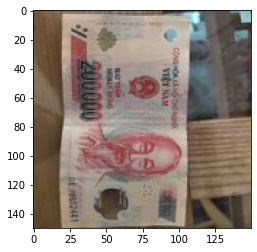

In [165]:
img=load_img('/content/drive/MyDrive/AI/HW13/MONEY_CNN/test/200nganf.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='1k'
if round(result[0][1])==1:
  prediction='10k'
if round(result[0][2])==1:
  prediction='100k'
if round(result[0][3])==1:
  prediction='200d'
if round(result[0][4])==1:
  prediction='2k'
if round(result[0][5])==1:
  prediction='20k'
if round(result[0][6])==1:
  prediction='200k'
if round(result[0][7])==1:
  prediction='500d'
if round(result[0][8])==1:
  prediction='5k'
if round(result[0][9])==1:
  prediction='50k'
if round(result[0][10])==1:
  prediction='500k'
print(prediction)


200k


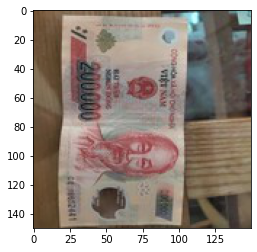

In [166]:
img=load_img('/content/drive/MyDrive/AI/HW13/MONEY_CNN/test/200ngan.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='1k'
if round(result[0][1])==1:
  prediction='10k'
if round(result[0][2])==1:
  prediction='100k'
if round(result[0][3])==1:
  prediction='200d'
if round(result[0][4])==1:
  prediction='2k'
if round(result[0][5])==1:
  prediction='20k'
if round(result[0][6])==1:
  prediction='200k'
if round(result[0][7])==1:
  prediction='500d'
if round(result[0][8])==1:
  prediction='5k'
if round(result[0][9])==1:
  prediction='50k'
if round(result[0][10])==1:
  prediction='500k'
print(prediction)


200k


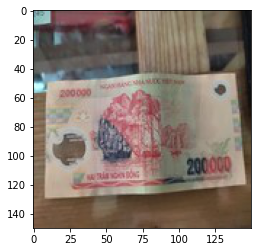

In [167]:
img=load_img('/content/drive/MyDrive/AI/HW13/MONEY_CNN/test/200k.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='1k'
if round(result[0][1])==1:
  prediction='10k'
if round(result[0][2])==1:
  prediction='100k'
if round(result[0][3])==1:
  prediction='200d'
if round(result[0][4])==1:
  prediction='2k'
if round(result[0][5])==1:
  prediction='20k'
if round(result[0][6])==1:
  prediction='200k'
if round(result[0][7])==1:
  prediction='500d'
if round(result[0][8])==1:
  prediction='5k'
if round(result[0][9])==1:
  prediction='50k'
if round(result[0][10])==1:
  prediction='500k'
print(prediction)


500k


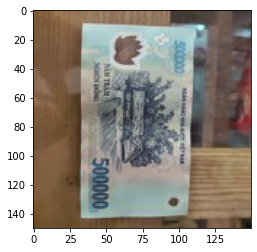

In [169]:
img=load_img('/content/drive/MyDrive/AI/HW13/MONEY_CNN/test/500ngandong.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='1k'
if round(result[0][1])==1:
  prediction='10k'
if round(result[0][2])==1:
  prediction='100k'
if round(result[0][3])==1:
  prediction='200d'
if round(result[0][4])==1:
  prediction='2k'
if round(result[0][5])==1:
  prediction='20k'
if round(result[0][6])==1:
  prediction='200k'
if round(result[0][7])==1:
  prediction='500d'
if round(result[0][8])==1:
  prediction='5k'
if round(result[0][9])==1:
  prediction='50k'
if round(result[0][10])==1:
  prediction='500k'
print(prediction)


500k


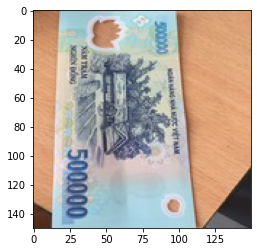

In [171]:
img=load_img('/content/drive/MyDrive/AI/HW13/MONEY_CNN/test/500k1.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='1k'
if round(result[0][1])==1:
  prediction='10k'
if round(result[0][2])==1:
  prediction='100k'
if round(result[0][3])==1:
  prediction='200d'
if round(result[0][4])==1:
  prediction='2k'
if round(result[0][5])==1:
  prediction='20k'
if round(result[0][6])==1:
  prediction='200k'
if round(result[0][7])==1:
  prediction='500d'
if round(result[0][8])==1:
  prediction='5k'
if round(result[0][9])==1:
  prediction='50k'
if round(result[0][10])==1:
  prediction='500k'
print(prediction)


500d


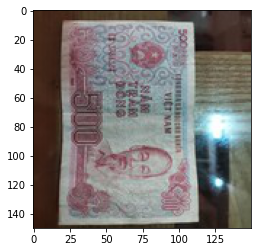

In [172]:
img=load_img('/content/drive/MyDrive/AI/HW13/MONEY_CNN/test/500dong.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='1k'
if round(result[0][1])==1:
  prediction='10k'
if round(result[0][2])==1:
  prediction='100k'
if round(result[0][3])==1:
  prediction='200d'
if round(result[0][4])==1:
  prediction='2k'
if round(result[0][5])==1:
  prediction='20k'
if round(result[0][6])==1:
  prediction='200k'
if round(result[0][7])==1:
  prediction='500d'
if round(result[0][8])==1:
  prediction='5k'
if round(result[0][9])==1:
  prediction='50k'
if round(result[0][10])==1:
  prediction='500k'
print(prediction)


500d


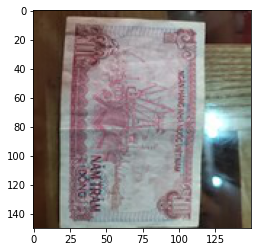

In [173]:
img=load_img('/content/drive/MyDrive/AI/HW13/MONEY_CNN/test/500d.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='1k'
if round(result[0][1])==1:
  prediction='10k'
if round(result[0][2])==1:
  prediction='100k'
if round(result[0][3])==1:
  prediction='200d'
if round(result[0][4])==1:
  prediction='2k'
if round(result[0][5])==1:
  prediction='20k'
if round(result[0][6])==1:
  prediction='200k'
if round(result[0][7])==1:
  prediction='500d'
if round(result[0][8])==1:
  prediction='5k'
if round(result[0][9])==1:
  prediction='50k'
if round(result[0][10])==1:
  prediction='500k'
print(prediction)


200d


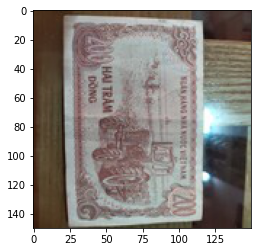

In [174]:
img=load_img('/content/drive/MyDrive/AI/HW13/MONEY_CNN/test/200dong.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='1k'
if round(result[0][1])==1:
  prediction='10k'
if round(result[0][2])==1:
  prediction='100k'
if round(result[0][3])==1:
  prediction='200d'
if round(result[0][4])==1:
  prediction='2k'
if round(result[0][5])==1:
  prediction='20k'
if round(result[0][6])==1:
  prediction='200k'
if round(result[0][7])==1:
  prediction='500d'
if round(result[0][8])==1:
  prediction='5k'
if round(result[0][9])==1:
  prediction='50k'
if round(result[0][10])==1:
  prediction='500k'
print(prediction)


200d


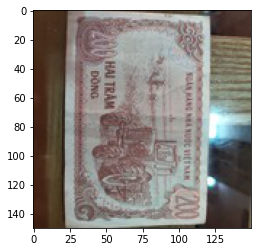

In [175]:
img=load_img('/content/drive/MyDrive/AI/HW13/MONEY_CNN/test/200d.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='1k'
if round(result[0][1])==1:
  prediction='10k'
if round(result[0][2])==1:
  prediction='100k'
if round(result[0][3])==1:
  prediction='200d'
if round(result[0][4])==1:
  prediction='2k'
if round(result[0][5])==1:
  prediction='20k'
if round(result[0][6])==1:
  prediction='200k'
if round(result[0][7])==1:
  prediction='500d'
if round(result[0][8])==1:
  prediction='5k'
if round(result[0][9])==1:
  prediction='50k'
if round(result[0][10])==1:
  prediction='500k'
print(prediction)
